In [1]:
## Brachial Tip Distribution
# Plots the distribution of the brachial nerve tips along the proximal-distal and aboral-oral axis. Tips are colored by the septum of exit. 
# Cassady S. Olson 


import os
import sys
import imagej
import numpy as np

import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.art3d as art3d

from nerveAnalysisFunctions import getFiles
plt.ion

ij = imagej.init(['sc.fiji:fiji', 'org.morphonets:SNT'], mode = "headless")

from scyjava import jimport 
PointInImage = jimport('sc.fiji.snt.util.PointInImage')
Tree = jimport('sc.fiji.snt.Tree')
TreeStatistics = jimport('sc.fiji.snt.analysis.TreeStatistics')


print("loaded")

loaded


In [2]:
# Set Data Path 
mainPath = r"/Users/ragsdalelab/Documents/Segmentation_NerveAnalysis/data/TipAlphaTub"
subFolders = [r"/aboral", r"/central"]


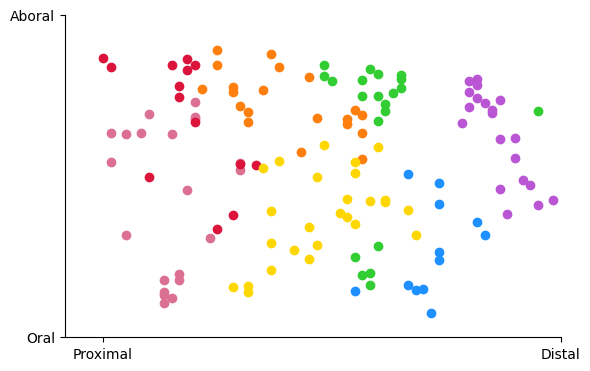

In [3]:
# preallocate tips array
tips = []

# Septa colors: manually selected 
cmap = ['palevioletred','crimson', 'tab:orange', 'gold', 'limegreen', 'dodgerblue', 'mediumorchid']
aboralColorIdx = np.array([0, 1, 2, 2, 4, 6, 6])
centralColorIdx = np.array([0, 1, 3, 3, 3, 4, 4, 5, 6])
aboralSortIdx = [0, 4, 1, 6, 2, 5, 3]
centralSortIdx = [8, 3, 7, 0, 4, 5, 2, 6, 1]

fig, ax = plt.subplots()

for folder in range(len(subFolders)):
    # select folder (aboral or central)
    thisFolder = getFiles(mainPath + subFolders[folder])

    # Get color idx 
    if subFolders[folder] == r"/aboral":
        sort = aboralSortIdx
        color1 = aboralColorIdx
    else:
        sort = centralSortIdx
        color1 = centralColorIdx
        
    for file in range(len(thisFolder)):
        #load tree 
        take = sort[file]
        thisFile = mainPath + subFolders[folder] + "/" + thisFolder[take]
        tree = Tree(thisFile)
        
        # Get Tip
        tree_stats = TreeStatistics(tree)
        tips = tree_stats.getTips()
        tips_iterator = tips.iterator()
        tips_list = []
        while tips_iterator.hasNext():
            t = tips_iterator.next()
            tips_list.append([t.x, t.y, t.z])
        tips_list = np.asarray(tips_list)

        # Set color for this tree
        idx = color1[file]

        # Plot 
        ax.scatter(tips_list[:,2], -tips_list[:,1], color = cmap[idx])
        
# Set plot parameters 
ax.set_xlim((150, 950))
ax.set_ylim((-1500, 0))
ax.set_yticks([-1400, 0], labels=['Oral' ,'Aboral'])
ax.set_xticks([250, 850], labels = ['Proximal', 'Distal'])
ax.set_ylim([-1400, 0])
ax.set_xlim([200,850])
ax.set_box_aspect(0.65)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False) 




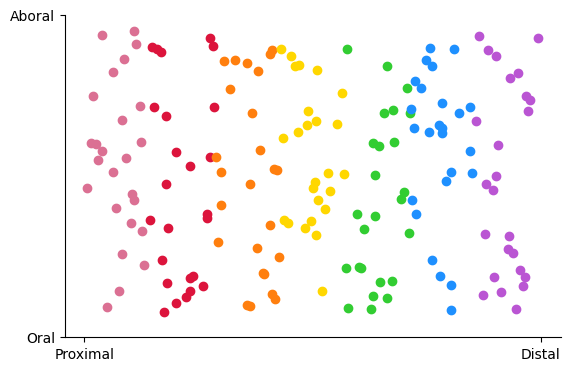

In [4]:
# Generate hypotethical distribution, with each septum covering the full aboral to oral extent of the brachial musculature and little proximal-distal overlap

# Set values for hypothetical distribution 
numPts  = 25
minX = 0
maxX = 700
inX = 100
minY = 0
maxY = 1153
colorIdx = np.array([0, 1, 2, 3, 4, 5, 6]) 

count1 = 0
fig, ax = plt.subplots()
for x in range(minX, maxX, inX):
    # Randomly generate x and y values
    xVals = np.array([np.random.uniform(low=x, high=x + inX, size=(numPts,))])
    yVals = np.array([np.random.uniform(low=minY, high= maxY, size=(numPts,))])

    #Set color idx
    idx = colorIdx[count1]

    #Plot
    ax.scatter(xVals, yVals, color = cmap[idx])
    count1 += 1

# Set plot parameters 
ax.set_yticks([-100, 1200], labels=['Oral' ,'Aboral'])
ax.set_xticks([0, 700], labels = ['Proximal', 'Distal'])
ax.set_box_aspect(0.65)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False) 

    